In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ML_project/runs_colab_gpu.csv")

new_cols = pd.DataFrame()
new_cols['images'] = df.classes * df.samples
new_cols['pixels'] = new_cols.images * df.image_height * df.image_width
new_cols['connections'] = df.dense_layer_1 * df.dense_layer_2 + df.dense_layer_2 * df.classes
new_cols['training_time_total'] = df.training_time_hours * 3600 + df.training_time_minutes * 60 + df.training_time_seconds
new_cols['training_time_per_epoch'] = new_cols.training_time_total / df.epochs
df['training_perc'] = (df.training*100).round(0).astype(int)
new_cols['model_file'] = df.agg('vgg16_{0[classes]}_{0[samples]}_{0[image_height]}_{0[training_perc]}_{0[dense_layer_1]}x{0[dense_layer_2]}.h5'.format, axis=1)

df = pd.concat([df.loc[:, :'samples'], 
           new_cols['images'], 
           df.loc[:, 'image_height':'image_width'],
           new_cols['pixels'],
           df.loc[:, 'training':'dense_layer_2'],
           new_cols['connections'],
           df.loc[:, 'batch_size':'training_time_seconds'],
           new_cols[['training_time_total','training_time_per_epoch']]           
          ],axis=1, join='inner')
df = df.sort_values(by=['accuracy', 'loss'], ascending=(False, True))
df

,classes,samples,images,image_height,image_width,pixels,training,dense_layer_1,dense_layer_2,connections,batch_size,learning_rate,patience,epochs,accuracy,loss,training_time_hours,training_time_minutes,training_time_seconds,training_time_total,training_time_per_epoch
1,3,400,1200,224,224,60211200,0.9,1024,1024,1051648,32,0.001,5,21,0.8750,0.4472,0,7,38,458,21.809524
0,3,200,600,224,224,30105600,0.9,1024,1024,1051648,32,0.001,5,22,0.8333,0.4404,0,4,24,264,12.000000
2,5,200,1000,224,224,50176000,0.9,512,512,264704,32,0.001,10,23,0.6900,0.8378,0,8,24,504,21.913043
5,5,400,2000,224,224,100352000,0.9,1024,1024,1053696,32,0.001,5,12,0.6768,0.9007,0,8,0,480,40.000000
6,5,400,2000,224,224,100352000,0.9,1024,1024,1053696,64,0.001,5,13,0.6717,0.9075,0,8,30,510,39.230769
4,5,400,2000,224,224,100352000,0.9,512,512,264704,32,0.001,10,15,0.6616,0.9888,0,11,14,674,44.933333
7,5,400,2000,224,224,100352000,0.9,2048,2048,4204544,32,0.001,5,13,0.6465,1.0916,0,8,43,523,40.230769
3,5,400,2000,224,224,100352000,0.8,1024,1024,1053696,32,0.001,5,9,0.6430,1.0500,0,6,20,380,42.222222
9,10,200,2000,224,224,100352000,0.9,1024,1024,1058816,64,0.001,10,29,0.6250,1.3855,0,21,11,1271,43.827586
8,10,200,2000,224,224,100352000,0.9,1024,1024,1058816,32,0.001,10,22,0.6000,1.3778,0,16,18,978,44.454545


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = [(1, 0, 0), (0, 0, 1)]  # R -> B
n_bins = [3, 6, 10, 100]  # Discretizes the interpolation into bins
cmap_name = 'my_list'
# Create the colormap
cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=100)

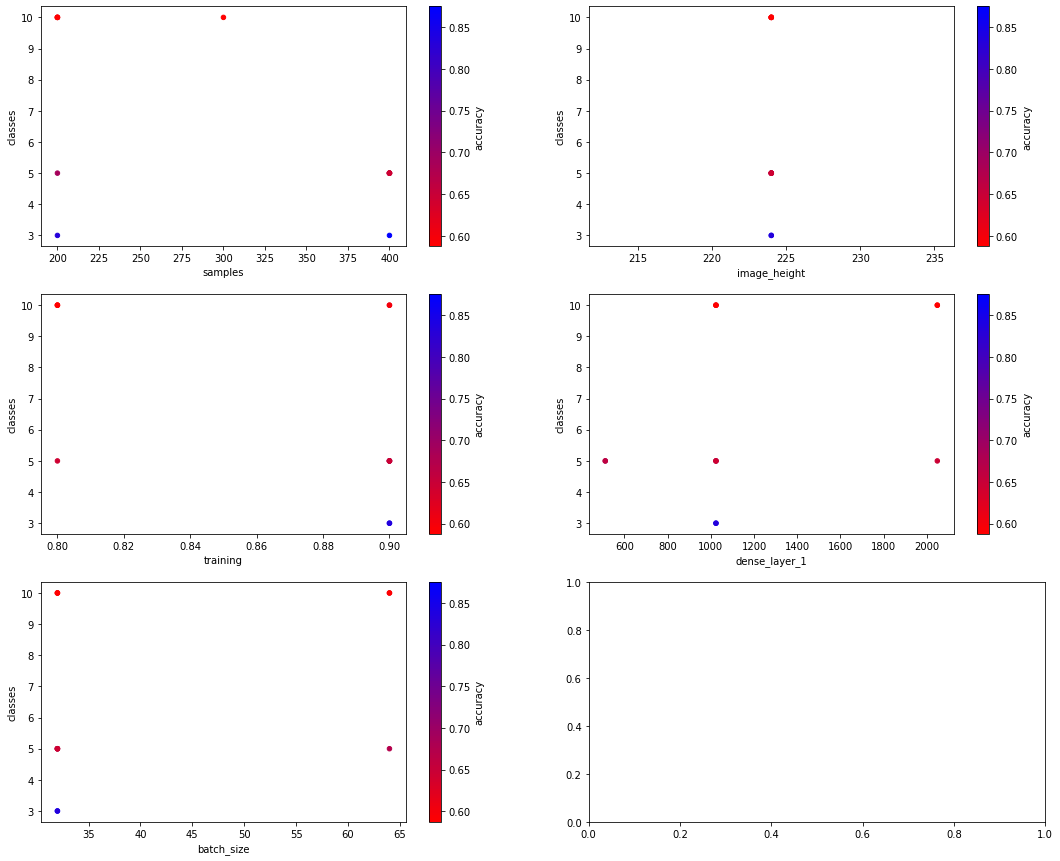

In [78]:
fig, ax = plt.subplots(3, 2, figsize=(18,15))

df.plot.scatter(ax=ax[0][0], x='samples', y='classes', c='accuracy', cmap=cm)
df.plot.scatter(ax=ax[0][1], x='image_height', y='classes', c='accuracy', cmap=cm)
df.plot.scatter(ax=ax[1][0], x='training',  y='classes', c='accuracy', cmap=cm)
df.plot.scatter(ax=ax[1][1], x='dense_layer_1',  y='classes', c='accuracy', cmap=cm)
df.plot.scatter(ax=ax[2][0], x='batch_size',  y='classes', c='accuracy', cmap=cm)
#df.plot.scatter(ax=ax[2][1], x='learning_rate', y='accuracy')

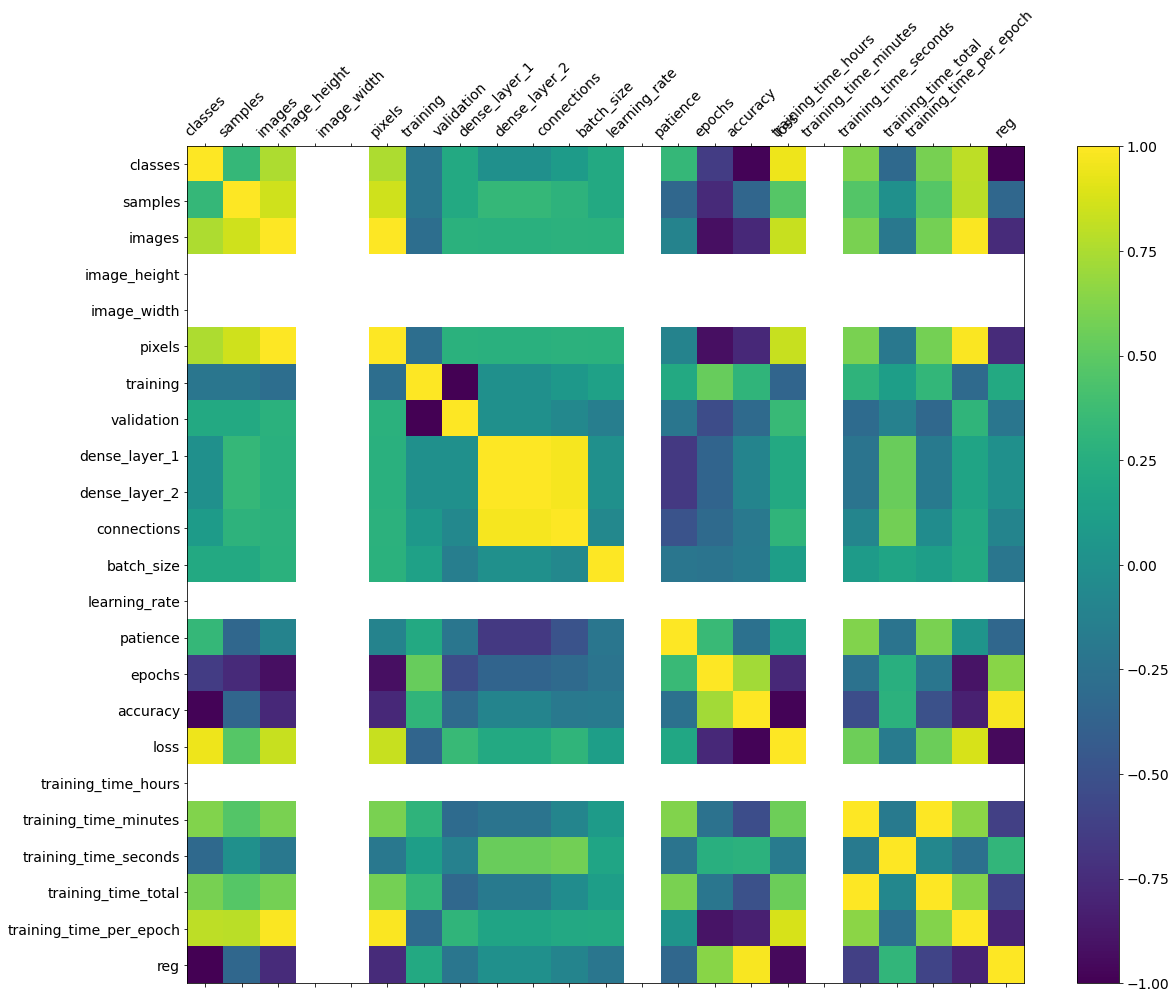

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)